In [3]:
from sympy import *
import numpy as np
# from numpy import logspace, pi, angle
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
f = np.logspace(-2,4,100)
w = 2*np.pi*f

stage 1a: lowpass filter

In [5]:
def f1a(R1,R2,C1):
    out = - R2/(R1*(1j*w*C1*R2+1))
    return out

0.10610329539459691

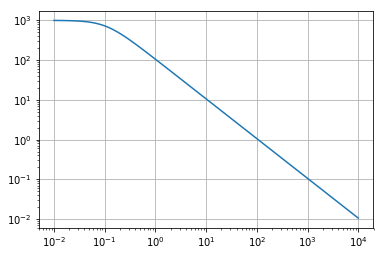

In [6]:
r1 = 20e3
r2 = 20e3
c3 = 75e-6
out1a = 1000*f1a(r1, r2, c3)
plt.loglog(f,np.abs(out1a))
plt.grid()
1/(c3*r2)/(2*np.pi)

C:\Miniconda3\lib\site-packages\matplotlib\axes\_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


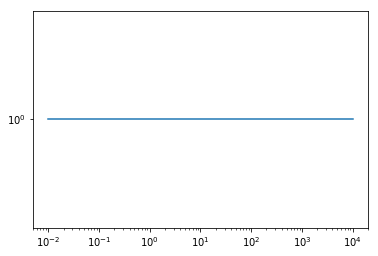

In [8]:
def f1b(f):
    out = 1.*np.ones(len(f))
    return out
out1b = f1b(f)
plt.loglog(f,np.abs(out1b))

stage 2: substractor

In [9]:
def f2(x1,x2):
    out = x1-x2
    return out

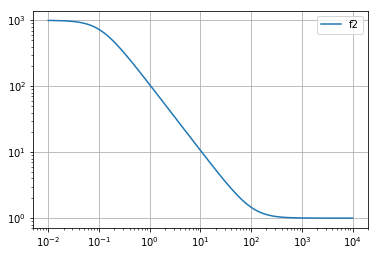

In [10]:
out2 = f2(out1a, out1b)
plt.loglog(f,np.abs(out2), label = 'f2')
plt.legend()
plt.grid()

stage 3: 10x amplify and low-pass filter around 1 Hz 

In [11]:
def f3(R1,R2,C1):
    out = - R2/(R1*(1j*w*C1*R2+1))
    return out

1.5915494309189535

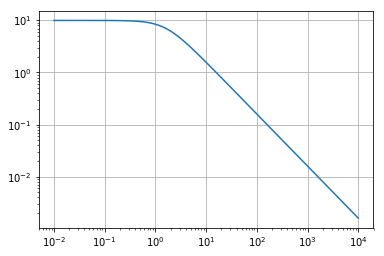

In [12]:
r1 = 1000
r2 = 10e3
c3 = 10e-6
out3 = f3(r1, r2, c3)
plt.loglog(f,np.abs(out3))
plt.grid()
1/(c3*r2)/(2*np.pi)

stage 4: low frequency boost

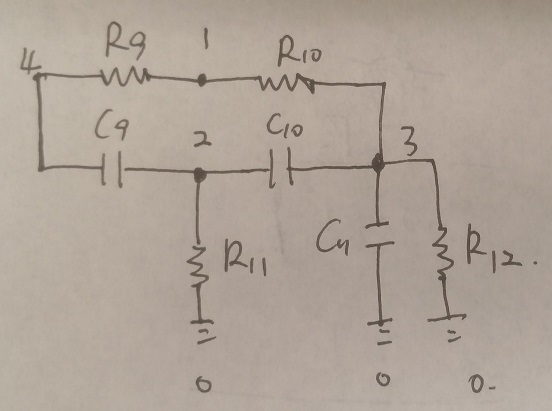

In [13]:
from IPython.display import Image
Image(filename='PZT servo U4.jpg')

In [14]:
## define symbols
V1,V2,V3,V4 = symbols('V1,V2,V3,V4')
i13,i20,i23,i30,i41,i42 = symbols('i13,i20,i23,i30,i41,i42')
R9,R10,R11,R12 = symbols('R9, R10, R11, R12')
C9,C10,C11 = symbols('C9, C10, C11')
w,f = symbols('w,f')

## values for the components
params = {'V4': 1,
          'w': 2*np.pi*f,
          'R9': 8.2e3,
          'R10': 8.2e3, 
          'R11': 3.9e3,
          'R12': 27e3,
          'C9': 500e-12,
          'C10':500e-12,
          'C11': 2e-9}

## equations of the circuit
eqs = [i41-(V4-V1)/R9,
       i13-(V1-V3)/R10,
       i42-(V4-V2)*1j*w*C9,
       i20-V2/R11,
       i23-(V2-V3)*1j*w*C10,
       i30-V3*(1j*w*C11+1/R12),
       i41-i13,
       i42-i23-i20,
       i30-i23-i13]

## solve the symbolic equations
print('It may take a few seconds to solve the equations.')
sol = solve(eqs,V1,V2,V3,i13,i20,i23,i30,i41,i42)
print('Solved!')

It may take a few seconds to solve the equations.
Solved!


In [15]:
v3 = sol.get(V3).subs(params)
f4 = lambdify(f,v3)

In [18]:
f = np.logspace(-2,1,100)
out4 = f4(f)

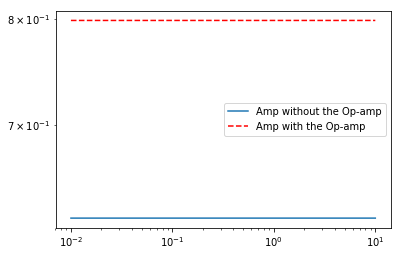

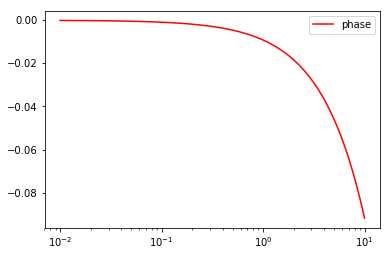

In [19]:
plt.loglog(f,abs(out4), label='Amp without the Op-amp');
plt.loglog(f,abs(out4)*(18+5.1)/18, 'r',ls='dashed',  label='Amp with the Op-amp')
plt.legend()
plt.figure()
plt.plot(f,np.angle(out4,deg=True),'r', label='phase')
plt.legend()
plt.xscale('log')

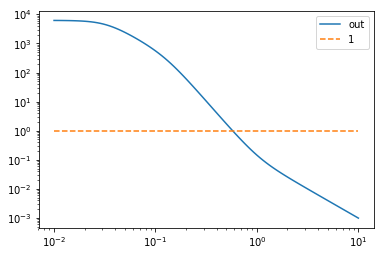

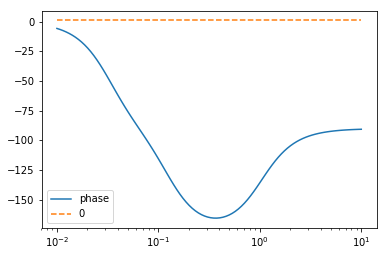

In [20]:
out = out2*out3*out4
plt.loglog(f, abs(out), label='out')
#plt.loglog(f,abs(f*out), label='out*f')
#plt.loglog(f, abs(f**2*out),label='out*f^2')
plt.loglog(f,f/f,label='1',ls='dashed')
plt.legend()
plt.figure()
plt.plot(f,np.angle(out,deg=True), label='phase')
plt.plot(f,f/f,label='0',ls='dashed')
plt.legend()
plt.xscale('log')

In [ ]:
import matplotlib.